Medidas de Tendência Central: quantidade de grupos de empréstimo que tiveram a mesma duração

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
data = "emprestimos_biblioteca_junho_2023.xlsx"
df = pd.read_excel(data, engine='openpyxl')

In [40]:
df['data_emprestimo'] = pd.to_datetime(df['DATA_EMPRESTIMO_CHAR'], errors='coerce', dayfirst=True)
df['data_devolucao'] = pd.to_datetime(df['DATA_DEV_EFETIVA_CHAR'], errors='coerce', dayfirst=True)

df['dias_emprestados'] = (df['data_devolucao'] - df['data_emprestimo']).dt.days

df = df[df['dias_emprestados'].notnull() & (df['dias_emprestados'] >= 0)]

df_grouped = df.groupby(['dias_emprestados']).size().reset_index(name='qtd_emprestimos')

In [41]:
# Média
soma = sum(df_grouped['qtd_emprestimos'].values)
quantidade = len(df_grouped['qtd_emprestimos'].values)
media = soma / quantidade

print(f"Média: {media:.2f}")

Média: 157.30


In [42]:
# Mediana (Usando pandas)
mediana = df_grouped['qtd_emprestimos'].median()
print(f"Mediana: {mediana:.2f}")

Mediana: 34.00


In [43]:
# Moda
emprestimos = df_grouped['qtd_emprestimos'].dropna()

def moda(emprestimos):
  frequencia = {}
  for emprestimo in emprestimos:    
    frequencia[emprestimo] = frequencia.get(emprestimo, 0) + 1
    
  frequencia_max = max(frequencia.values())
  modas = [i for i, freq in frequencia.items() if freq == frequencia_max]
  return modas

modas = moda(emprestimos)

print("Moda:", ", ".join(f"{m:.2f}" for m in modas))

Moda: 2.00, 1.00


Média: 157.30
Mediana: 34.00
Moda(s): 2.00, 1.00
1º Quartil (Q1): 7.00
3º Quartil (Q3): 191.25
Percentil 90 (P90): 357.00


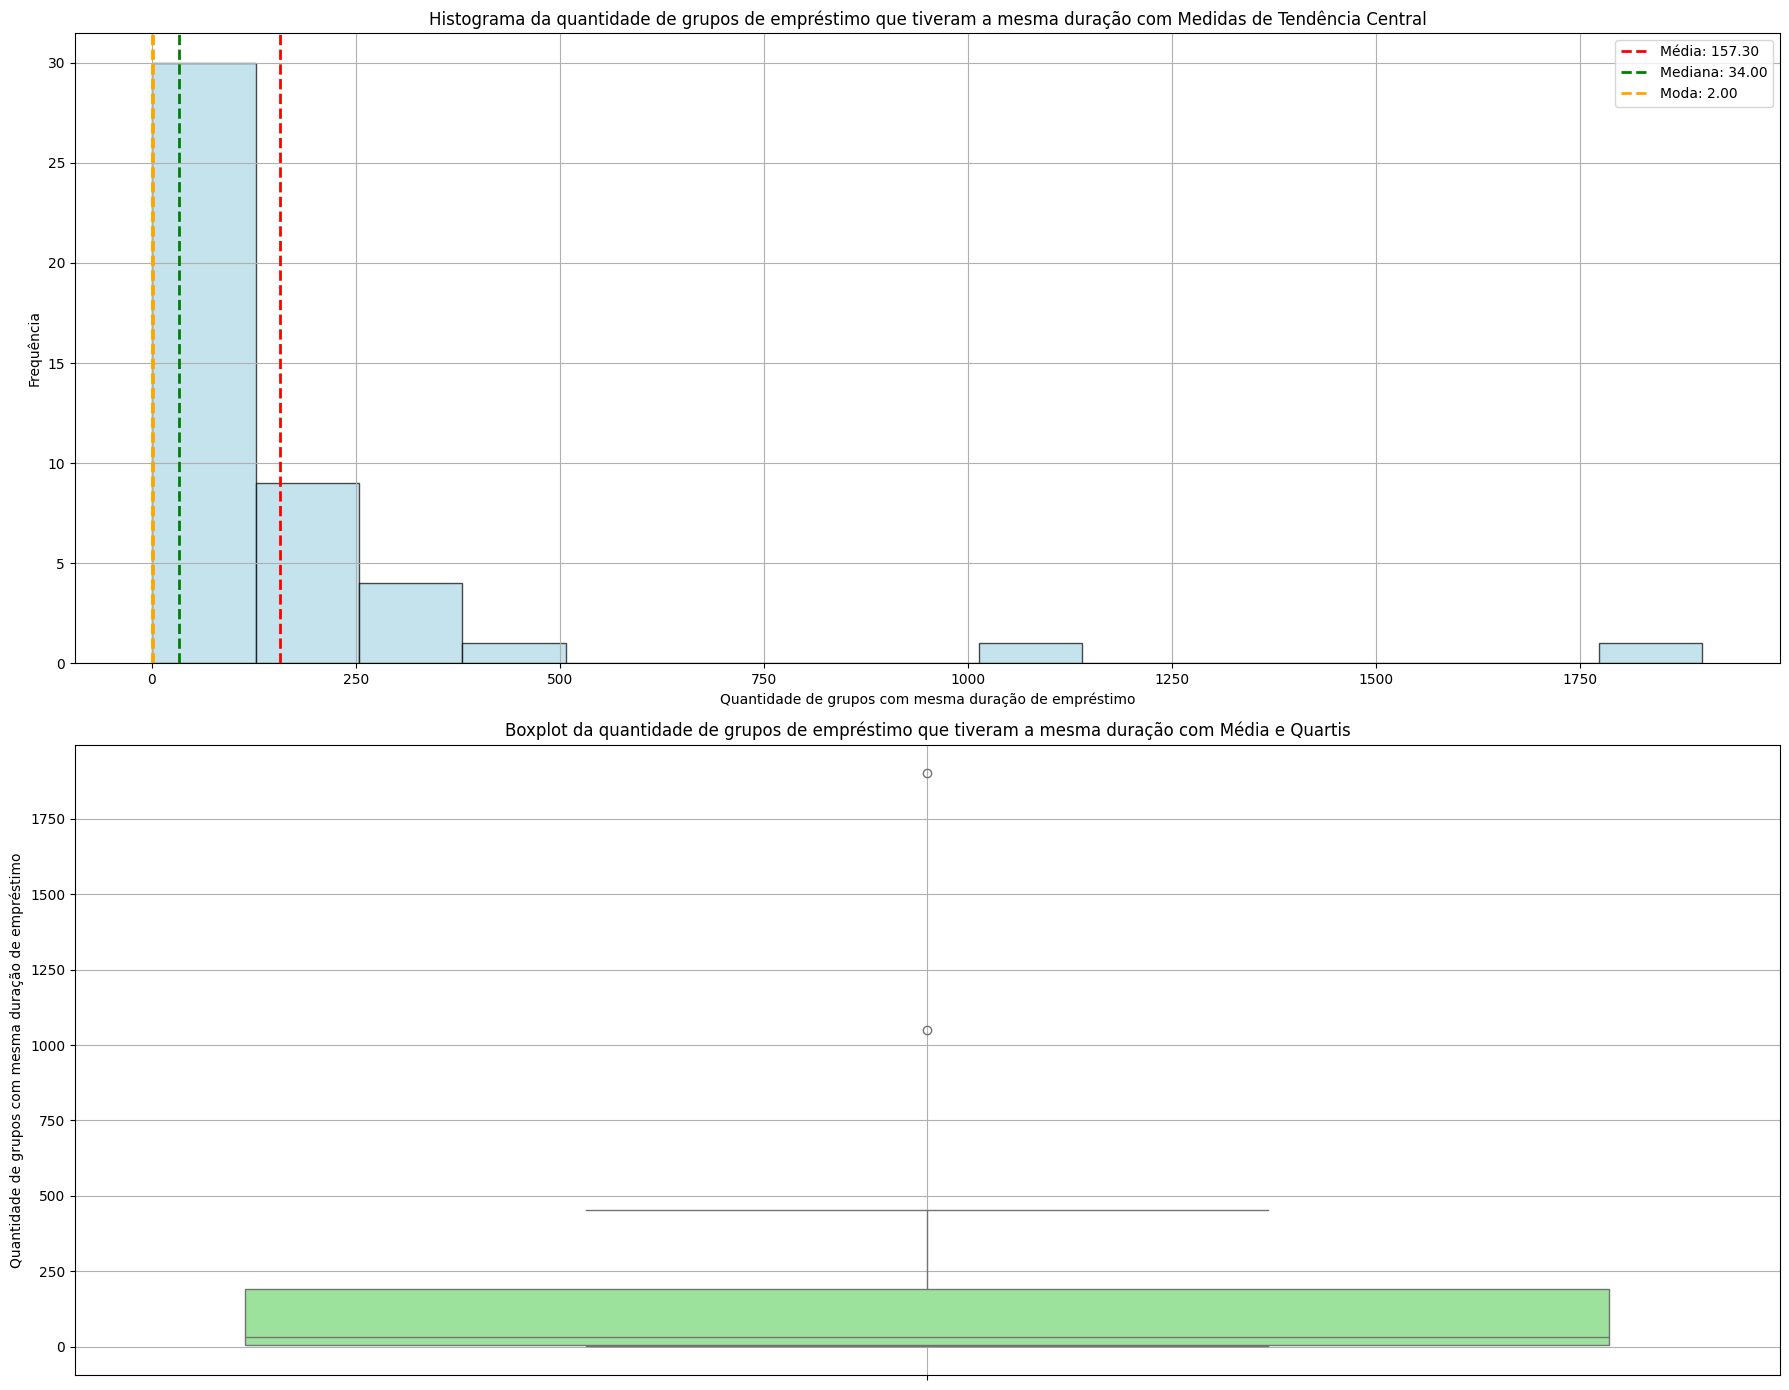

,Média,Mediana,Moda,1º Quartil (Q1),3º Quartil (Q3),Percentil 90 (P90)
0,157.304348,34.0,"2.00, 1.00",7.0,191.25,357.0


In [44]:

data = df_grouped['qtd_emprestimos'].values

mean = media
median = mediana
modes = moda(emprestimos)

q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
p90 = np.percentile(data, 90)

print(f"Média: {mean:.2f}")
print(f"Mediana: {median:.2f}")
print("Moda(s):", ", ".join(f"{m:.2f}" for m in modes))
print(f"1º Quartil (Q1): {q1:.2f}")
print(f"3º Quartil (Q3): {q3:.2f}")
print(f"Percentil 90 (P90): {p90:.2f}")

fig, axes = plt.subplots(2, 1, figsize=(18, 14))

# Histograma com as linhas da Média e Mediana
axes[0].hist(data, bins=15, color='lightblue', edgecolor='black', alpha=0.7)
axes[0].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean:.2f}')
axes[0].axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median:.2f}')
for i, m in enumerate(modes):
    label = f'Moda: {m:.2f}' if i == 0 else None  # Apenas a primeira linha terá legenda
    axes[0].axvline(m, color='orange', linestyle='dashed', linewidth=2, label=label)
axes[0].legend()
axes[0].set_title('Histograma da quantidade de grupos de empréstimo que tiveram a mesma duração com Medidas de Tendência Central')
axes[0].set_xlabel('Quantidade de grupos com mesma duração de empréstimo')
axes[0].set_ylabel('Frequência')
axes[0].grid(True)

# Boxplot para visualizar os Quartis e a Mediana
sns.boxplot(data=data, color='lightgreen', ax=axes[1])
axes[1].set_title('Boxplot da quantidade de grupos de empréstimo que tiveram a mesma duração com Média e Quartis')
axes[1].set_ylabel('Quantidade de grupos com mesma duração de empréstimo')
axes[1].grid(True)

plt.tight_layout()
plt.show()

summary = pd.DataFrame({
    'Média': [mean],
    'Mediana': [median],
    'Moda': [", ".join(f"{m:.2f}" for m in modes)],
    '1º Quartil (Q1)': [q1],
    '3º Quartil (Q3)': [q3],
    'Percentil 90 (P90)': [p90]
})

summary